In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
data_path = './getting-started/train_data_50.csv'
original_data = pd.read_csv(data_path)
original_data['Date'] = pd.to_datetime(original_data['Date'])
original_data.set_index(['Ticker', 'Date'], inplace=True)

original_data['Ret'] = original_data['Open'].groupby('Ticker').pct_change()
original_data.dropna(inplace=True)
returns = original_data['Ret'].unstack(level='Ticker')

original_data['Log Ret'] = np.log(original_data['Open'] / original_data['Open'].groupby('Ticker').shift(1))
original_data.dropna(inplace=True)
log_returns = original_data['Log Ret'].unstack(level='Ticker')
log_returns

Ticker,A,B,C,D,E,F,G,H,I,J,...,ZO,ZP,ZQ,ZR,ZS,ZT,ZU,ZV,ZW,ZX
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-08,-0.016746,-0.016380,-0.007370,-0.007055,-0.017348,-0.015860,-0.016356,-0.000346,0.021220,-0.003348,...,-0.013539,0.001271,-0.003051,-0.058708,0.000687,-0.029163,-0.013646,-0.002140,0.002253,0.000000
2015-07-09,0.008141,0.007397,-0.010896,-0.002466,0.005086,0.010826,0.015168,0.005355,-0.001368,0.005575,...,-0.011324,0.000181,0.005292,-0.000926,0.002829,0.000615,0.009189,0.006689,0.006952,0.005356
2015-07-10,0.007652,0.010919,0.010117,0.000925,0.007123,-0.017651,0.027263,0.000517,-0.010914,0.009180,...,-0.022632,0.002627,0.001119,0.012047,0.001881,-0.027807,-0.003623,0.006645,0.005793,0.003111
2015-07-13,0.009694,0.009918,0.008342,0.012485,0.014886,0.002394,0.005886,0.003095,0.008466,0.010420,...,0.005503,0.006403,0.018050,0.000114,0.005963,0.036982,0.011463,0.008698,-0.000667,0.013576
2015-07-14,0.003454,0.001325,0.006803,0.025181,0.020099,0.013236,0.031832,-0.006027,-0.000490,0.026439,...,0.003854,0.014281,0.001881,-0.000572,0.002375,-0.015572,-0.004018,-0.005322,0.010395,0.002536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,0.026969,0.016324,-0.002686,-0.002214,0.008310,0.003547,0.018843,0.004655,0.013681,0.025901,...,0.015009,-0.011875,-0.000733,0.027708,0.026675,0.017284,0.008752,0.027748,0.017830,0.009599
2021-04-06,-0.005193,-0.010482,0.010703,0.016635,0.026079,0.016946,0.008849,-0.007900,0.000392,0.029267,...,0.001133,0.017428,-0.003671,-0.024908,-0.015633,0.005854,0.004773,0.000956,0.019782,0.012094
2021-04-07,0.011553,0.002027,-0.014283,-0.002032,-0.008128,-0.005921,-0.002407,-0.010850,0.013491,0.000986,...,0.001235,0.011379,0.013153,-0.004792,0.006873,-0.006458,0.005426,0.009688,0.000807,-0.002458


In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)
pca = PCA(n_components=15).fit(scaled_data)
components = pca.components_.T
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

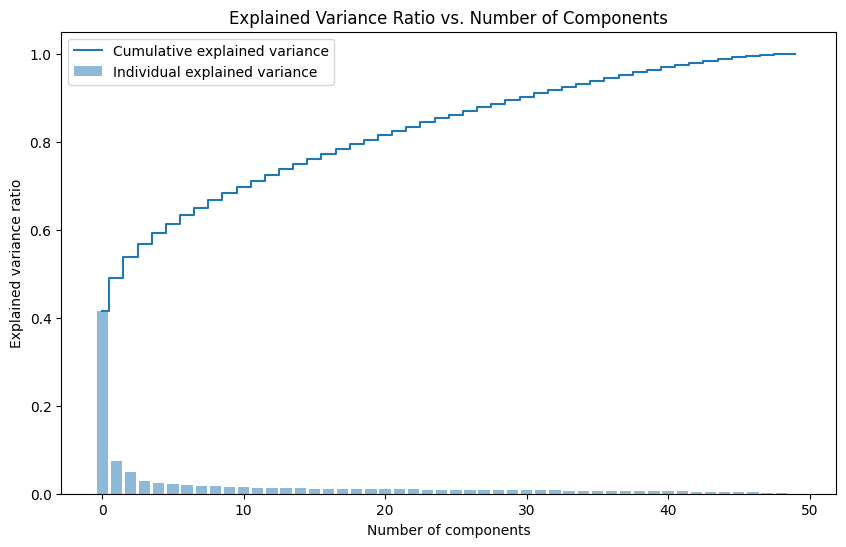

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_var)), explained_var, alpha=0.5, label='Individual explained variance')
plt.step(range(len(cum_explained_var)), cum_explained_var, where='mid', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

In [11]:
max_clusters = 40  # This can be any number based on domain knowledge or experimentation
inertia = []
for n in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=75, n_init=10, random_state=42)
    kmeans.fit(components)
    inertia.append(kmeans.inertia_)

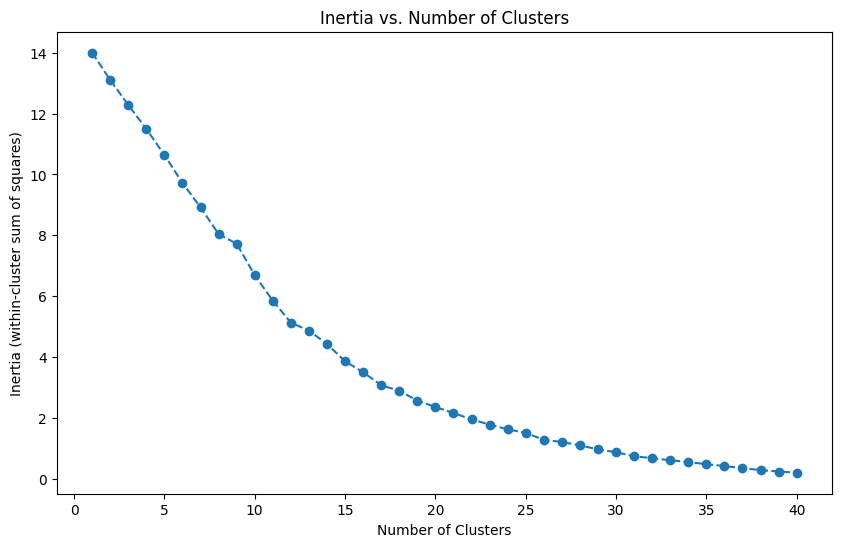

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()